# Tax Breakdown

**1. Prepare Workspace**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import seaborn as sns
sns.set(style='darkgrid', font='monospace')
%matplotlib inline

In [2]:
# Import data
df_snk = pd.read_csv('Single No Kids.csv').fillna(0)
df_mnk = pd.read_csv('Married No Kids One Earner.csv').fillna(0)
df_m1k = pd.read_csv('Married One Kid Under Six One Earner.csv').fillna(0)
df_m2k = pd.read_csv('Married Two Kids Under Six One Earner.csv').fillna(0)
df_m4k = pd.read_csv('Married Four Kids Under Six One Earner.csv').fillna(0)

**2. Visualize**

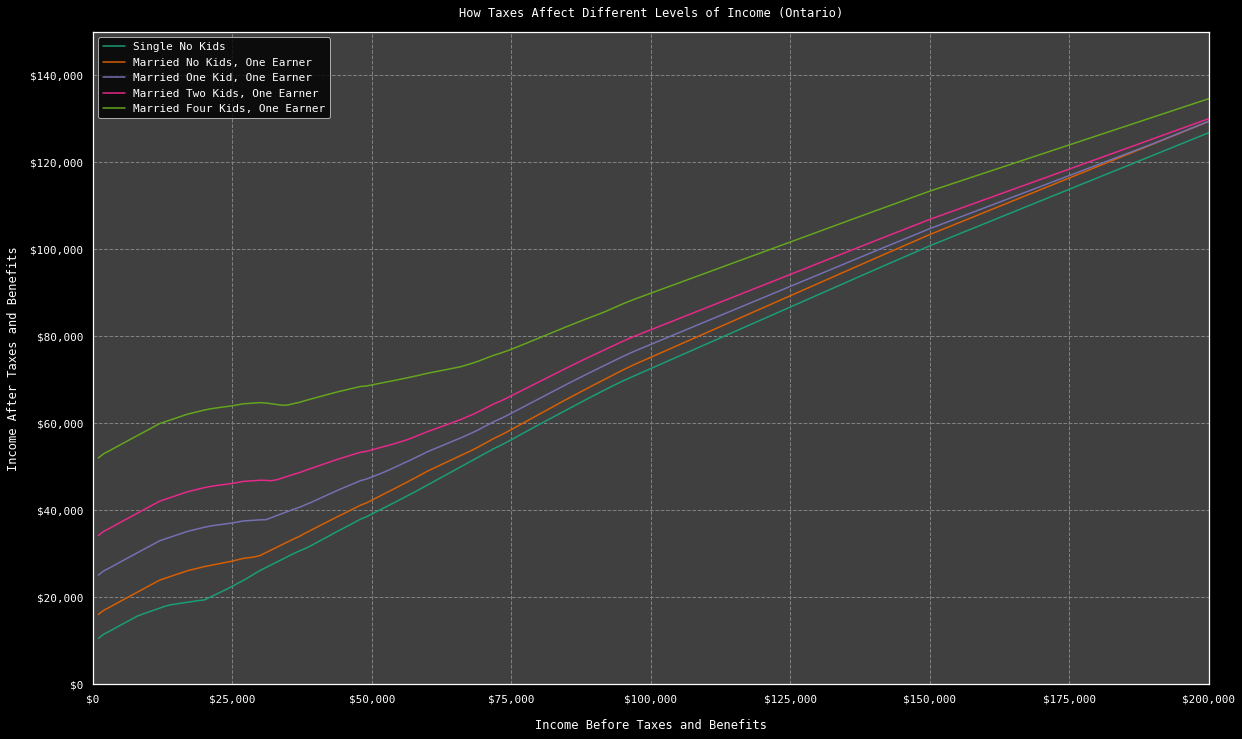

In [3]:
# Compare net income
df_snk['Type'] = 'Single No Kids'
df_mnk['Type'] = 'Married No Kids, One Earner'
df_m1k['Type'] = 'Married One Kid, One Earner'
df_m2k['Type'] = 'Married Two Kids, One Earner'
df_m4k['Type'] = 'Married Four Kids, One Earner'
df = pd.concat([df_snk, df_mnk, df_m1k, df_m2k, df_m4k], sort=False).reset_index(drop=True)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_facecolor('#404040')
plt.grid(color='grey', linestyle='--')

sns.lineplot(x='Gross Income', y='Net Income', data=df, hue='Type', palette='Dark2')
plt.title('How Taxes Affect Different Levels of Income (Ontario)', pad=15)
plt.xlabel('Income Before Taxes and Benefits', labelpad=15)
plt.ylabel('Income After Taxes and Benefits', labelpad=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.xaxis.set_major_formatter(tick) 

plt.ylim(0,150000)
plt.xlim(0, 200000)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

#plt.savefig('How Taxes Affect Different Levels of Income.png', bbox_inches='tight', pad_inches=0.25)

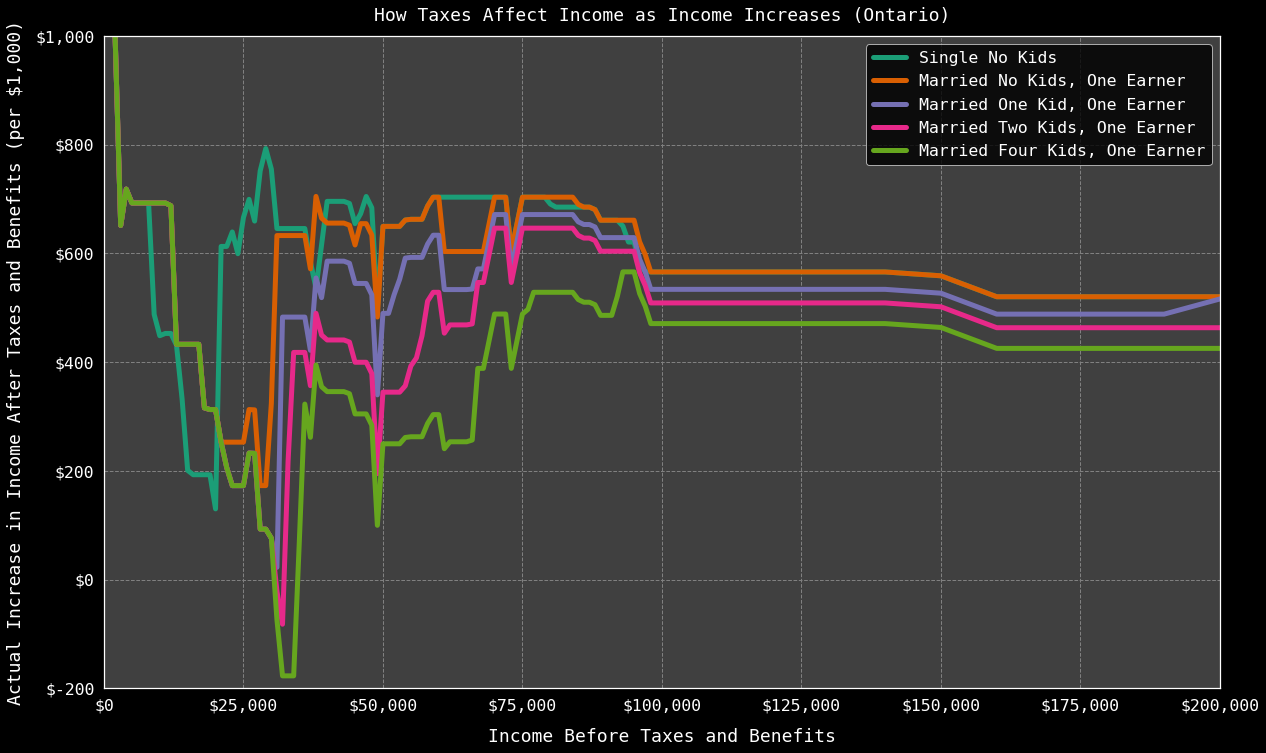

In [10]:
# Compare rate of change in net income
gi, ni = 'Gross Income', 'Net Income'
df_snk['Rate of Change'] = np.where(df_snk[gi] <= 100000, df_snk[ni].diff(), df_snk[ni].diff() / 10)
df_mnk['Rate of Change'] = np.where(df_mnk[gi] <= 100000, df_mnk[ni].diff(), df_mnk[ni].diff() / 10)
df_m1k['Rate of Change'] = np.where(df_m1k[gi] <= 100000, df_m1k[ni].diff(), df_m1k[ni].diff() / 10)
df_m2k['Rate of Change'] = np.where(df_m2k[gi] <= 100000, df_m2k[ni].diff(), df_m2k[ni].diff() / 10)
df_m4k['Rate of Change'] = np.where(df_m4k[gi] <= 100000, df_m4k[ni].diff(), df_m4k[ni].diff() / 10)
df_roc = pd.concat([df_snk, df_mnk, df_m1k, df_m2k, df_m4k], sort=False).reset_index(drop=True)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20, 12))
ax.set_facecolor('#404040')
plt.grid(color='grey', linestyle='--')

sns.lineplot(x='Gross Income', y='Rate of Change', data=df_roc, hue='Type', palette='Dark2')
plt.title('How Taxes Affect Income as Income Increases (Ontario)', pad=15)
plt.xlabel('Income Before Taxes and Benefits', labelpad=15)
plt.ylabel('Actual Increase in Income After Taxes and Benefits (per $1,000)', labelpad=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.xaxis.set_major_formatter(tick) 

plt.ylim(-200,1000)
plt.xlim(0, 200000)

sns.set(style='darkgrid', font='monospace')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 5})

plt.savefig('How Taxes Affect Income as Income Increases.png', bbox_inches='tight', pad_inches=0.25)

In [5]:
df_roc.to_csv('Rate of Change in Income After Taxes.csv', index=False)